# Homework 2

For this assignment, you will be developing an artificial neural network to classify data given in the __[Dry Beans Data Set](https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset#)__. This data set was obtained as a part of a research study by Selcuk University, Turkey, in which a computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features. More details on the study can be found in the following __[research paper](https://www.sciencedirect.com/science/article/pii/S0168169919311573)__.

## About the Data Set For Q1
Seven different types of dry beans were used in a study in Selcuk University, Turkey, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features - 12 dimensions and 4 shape forms - were obtained from the grains.

Number of Instances (records in the data set): __13611__

Number of Attributes (fields within each record, including the class): __17__

### Data Set Attribute Information:

1. __Area (A)__ : The area of a bean zone and the number of pixels within its boundaries.
2. __Perimeter (P)__ : Bean circumference is defined as the length of its border.
3. __Major axis length (L)__ : The distance between the ends of the longest line that can be drawn from a bean.
4. __Minor axis length (l)__ : The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. __Aspect ratio (K)__ : Defines the relationship between L and l.
6. __Eccentricity (Ec)__ : Eccentricity of the ellipse having the same moments as the region.
7. __Convex area (C)__ : Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. __Equivalent diameter (Ed)__ : The diameter of a circle having the same area as a bean seed area.
9. __Extent (Ex)__ : The ratio of the pixels in the bounding box to the bean area.
10. __Solidity (S)__ : Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11. __Roundness (R)__ : Calculated with the following formula: (4piA)/(P^2)
12. __Compactness (CO)__ : Measures the roundness of an object: Ed/L
13. __ShapeFactor1 (SF1)__
14. __ShapeFactor2 (SF2)__
15. __ShapeFactor3 (SF3)__
16. __ShapeFactor4 (SF4)__

17. __Classes : *Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, Sira*__

### Libraries that can be used :
- NumPy, SciPy, Pandas, Sci-Kit Learn, TensorFlow, Keras
- Any other library used during the lectures and discussion sessions.

## About the Data Set For Q3
In this problem, we will be exploring the car dataset and analyzing their fuel efficiency. <br >
Specifically, we will do some exploratory analysis with visualizations, then we will build a model for Simple Linear Regression, a model for Polynomial Regression, and one model for Logistic Regression. <br >
**The given dataset is already modified and cleaned**, but you can find [the original information here.](https://archive.ics.uci.edu/ml/datasets/auto+mpg).

## Dataset Attribute Information

1. **mpg**: Miles per gallon. This is one primary measurement for car fuel efficiency.
2. **displacement** : The cylinder volumes in cubic inches.
3. **horsepower** : Engine power.
4. **weight** : In pounds.
5. **acceleration** : The elapsed time in seconds to go from 0 to 60mph.
6. **origin** : Region of origin.

### Libraries that can be used: numpy, pandas, scikit-learn, seaborn, plotly, matplotlib
Any libraries used in the discussion materials are also allowed.


### Other Notes
- Don't worry about not being able to achieve high accuracy, it is neither the goal nor the grading standard of this assignment.
- Discussion materials should be helpful for doing the assignments.
- The homework submission should be a .ipynb file.


## Exercise 1 : Data Understanding (23 points in total)
* As the classes are categorical, use one-hot encoding to represent the set of classes. 
* Normalize each field of the input data using the min-max normalization technique.
* Plot the distribution of data and analyze the distribution. Explain if the data is symmetric, or sekewed to right or left. 
* Plot the target (class) variable and show if data has linear or non-linear behavior. Suggest whether a linear or non-linear model should be developed for the data. 
    * hints: After normalizing the input variables, for each pair of input variables (xi, xj), create a 2D pair-plot between the variables, and color-code the target variable according to the label of the target variable (for example you can use red for y="sira"). Then analyze the relationship between the input variables and the target variable to see if you can find a linear no non-linear line to separate the data points according to the target variable class. For each combination of input variables, create a separate pair plot. Pair plot has been discussed in the HW1 discussion. 

In [1]:
import sys
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

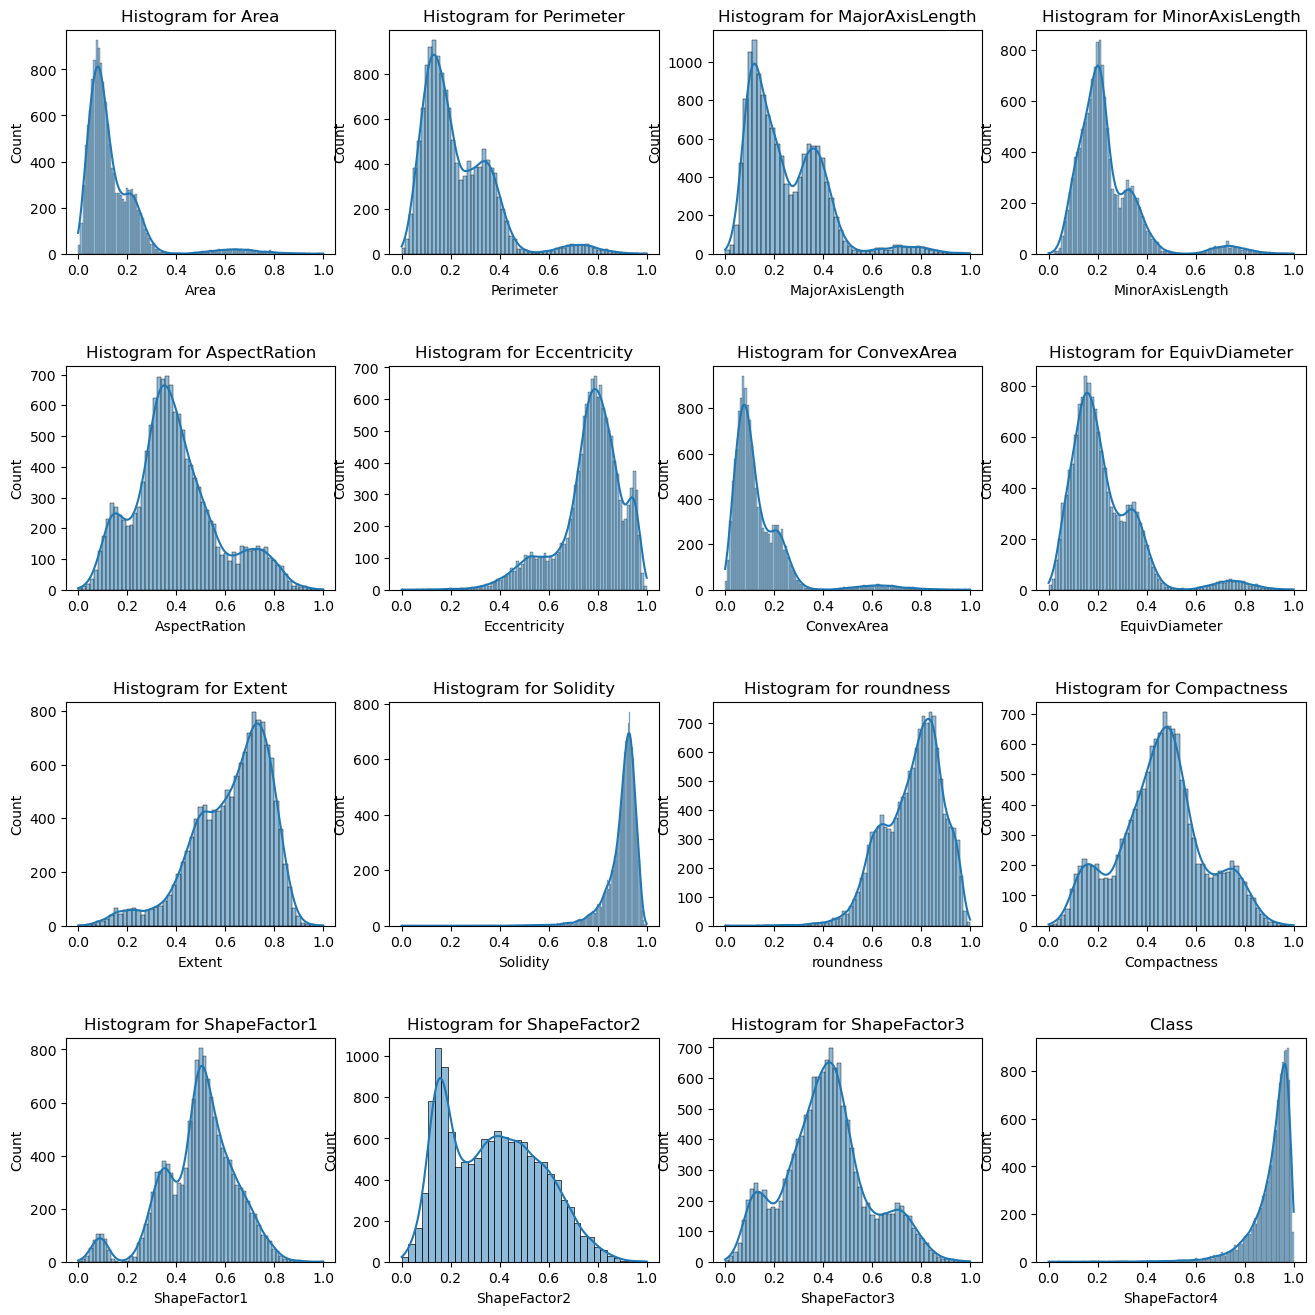

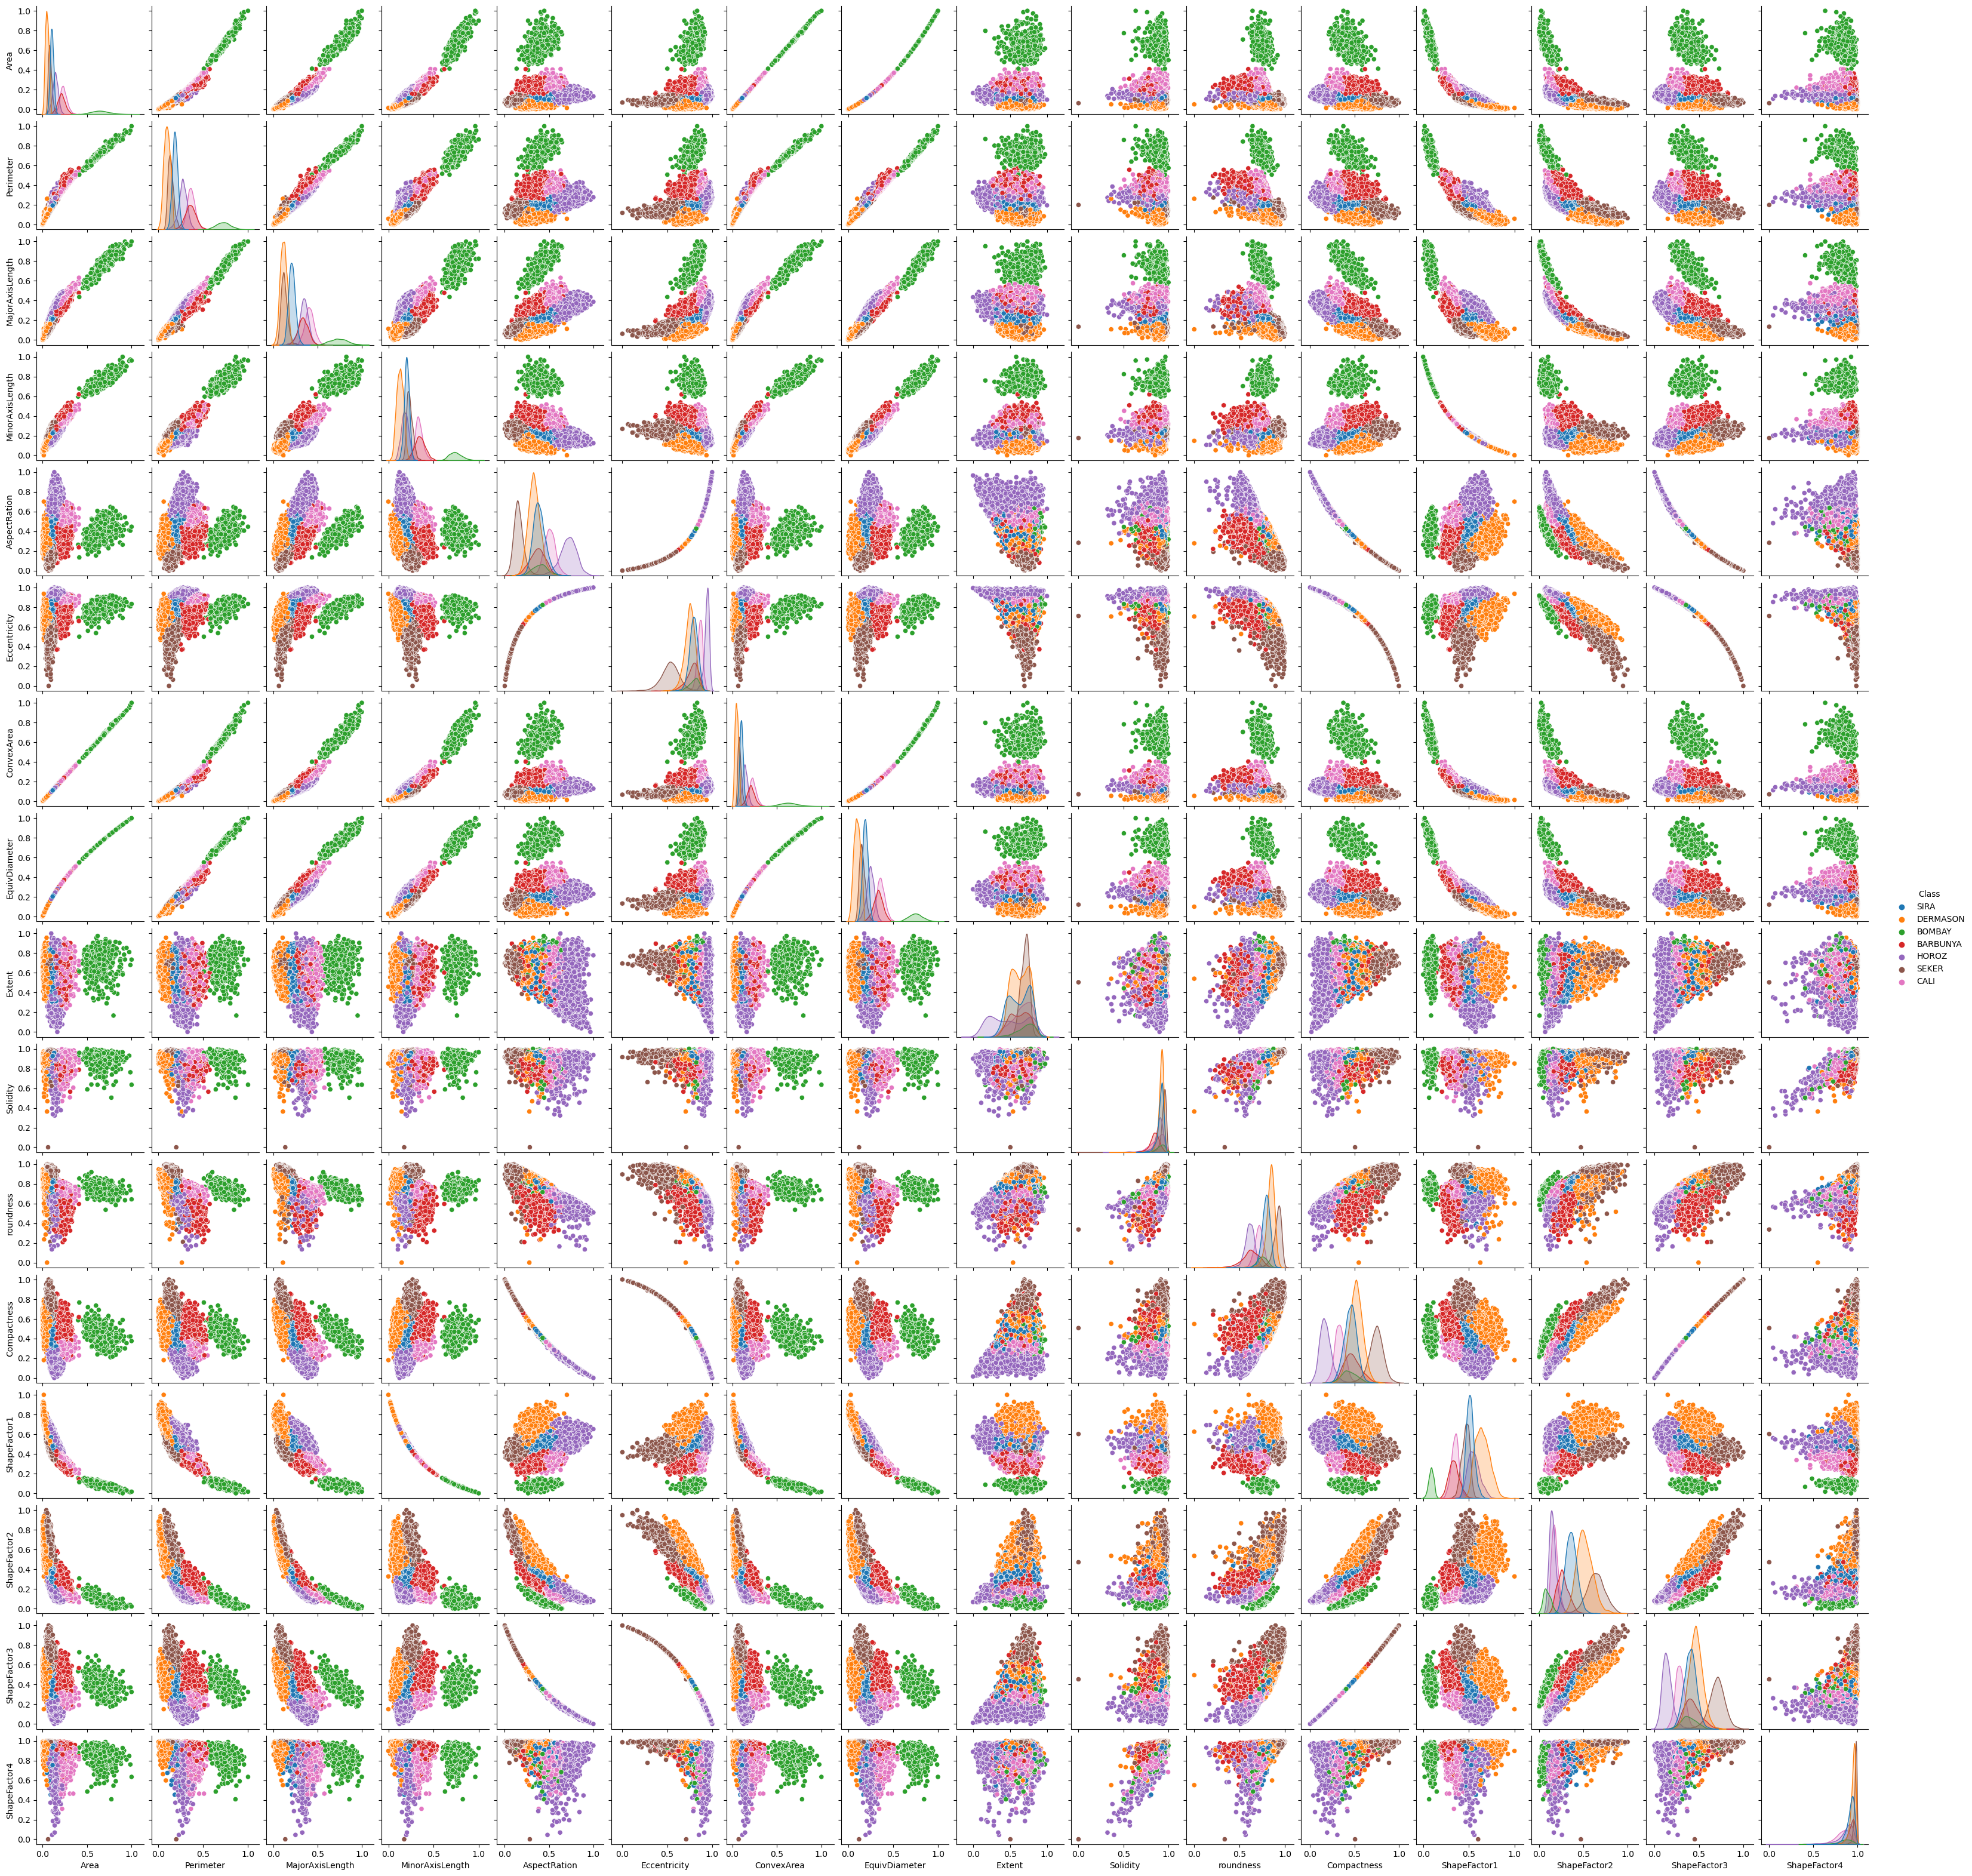

In [2]:
df = pd.read_csv("Dry_Beans_Dataset.csv")

df_encoded = pd.get_dummies(df['Class'], dtype=int)

scaler = MinMaxScaler(feature_range=(0, 1))
x_rescaled = pd.DataFrame(scaler.fit_transform(df.drop('Class', axis=1)), columns=df.drop('Class', axis=1).columns)

fig, axes = plt.subplots(4, 4, figsize=(16, 16))
fig.subplots_adjust(hspace=0.5)

for i, (column, data) in enumerate(x_rescaled.items()):
    row, col = divmod(i, 4)
    sns.histplot(data, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Histogram for {column}')

axes[3, 3].set_title('Class')

for i in range(len(x_rescaled.columns), 16):
    fig.delaxes(axes[i // 4, i % 4])

plt.show()

x_rescaled['Class'] = df['Class']
sns.pairplot(x_rescaled, hue='Class', height=2)
plt.show()

Pair Plots:

Here's what I noticed when I looked at how my data relates to the target:

In most cases, it's hard to draw a straight line to separate our data into different groups. This means that a simple straight-line model might not be the best for sorting things out. Sometimes, the dots on the graphs make interesting shapes, like curves or groups. This suggests that using a more flexible, non-straight-line model could be a better fit.

I also found some combinations of features that seem to group together a lot. For instance, when we look at "Aspect Ratio" and "Major Axis Length," the groups are pretty clear. These could be useful for figuring out the different classes.

Some of the plots make it clear where one group ends and another begins, while others are a bit messy. This hints that we might benefit from using a mix of models, some that draw straight lines and others that follow more complex patterns.

Histograms:

Now, let's see if our data behaves like it should:

Area: It's a bit tilted to the right, with most of the data bunched up in the middle and a bit more stretched out to the right.
Perimeter: It's somewhat tilted to the right, with a little tail pointing to the right.
Major Axis Length: It leans to the right with a bigger tail on the right side.
Minor Axis Length: It slightly tilts to the right with a small tail on the right.
Aspect Ratio: It's tilted to the right, with the tail clearly stretching to the right.
Eccentricity: It leans a bit to the left but is almost even on both sides.
Convex Area: It's a little tilted to the right with a slight extension to the right.
Equivalent Diameter: It's a bit tilted to the right, with a small tail on the right.
Extent: It's kind of balanced with some bumps on both sides (though we should double-check this).
Solidity: It leans to the left, with a clear tail on the left.
Roundness: It tilts to the left, and the left side stands out more.
Compactness: It's roughly balanced, with two tails that look almost the same.
Shape Factor 1: It tilts to the right, with a much longer right tail.
Shape Factor 2: It tilts to the right, with a big rightward tail.
Shape Factor 3: It tilts to the right, with a clear rightward tail.
Shape Factor 4: It slightly tilts to the left, with a small leftward tail.

## Exercise 2 - Logistic Regression (20 points in total)
Recall the dataset from last week homework

Now we are going to build a classification model on ``origin`` using all the other 5 attributes. <br >
Note that Logistic Regression is a binary classificaiton algorithm.

### Exercise 2.1 - Processing and Splitting the Dataset (5 points)
In this exercise 3, we only consider those observations where they originate from either "USA" or "Japan". <br >
So please **remove** those observations that originate from "Europe". <br >
And then, split the data into training and testing set with the ratio of 80:20. <br >

In [3]:
auto_df = pd.read_csv('auto-mpg.csv')
filtered_df = auto_df[auto_df['origin'].isin(['USA', 'Japan'])]

x = filtered_df[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = filtered_df['origin']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

### Exercise 2.2 - Logistic Regression (15 points)

Using all the other 5 attributes, please build a Logistic Regression model that distinguishes between cars from Japan and cars from the USA. <br >
Then, **if we are distinguishing between Japan and Europe this time, how do you think the model performance(in terms of accuracy) will change? Provide your reasoning.** (Hint: Exercise 1)

Requirements
 - Report the testing precision and recall for both regions.

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

report = classification_report(y_test, y_pred, target_names=['Japan', 'USA'])
print(report)

              precision    recall  f1-score   support

       Japan       0.81      0.62      0.70        21
         USA       0.84      0.93      0.88        44

    accuracy                           0.83        65
   macro avg       0.82      0.78      0.79        65
weighted avg       0.83      0.83      0.82        65



How Well the Model Works:

The model did a good job, getting it right 83% of the time when telling if a car is from Japan or the USA.

Looking at Pictures:

When we look at the data, we can see that cars from Japan and the USA are pretty different when it comes to things like how far they can go on a gallon of fuel and how big their engines are. That's why the model did okay.

Japan vs. Europe:

But when we compare cars from Japan to those from Europe, things get a bit mixed up. Some cars from Japan and Europe look similar when it comes to fuel efficiency, engine size, and power. So, it's not as easy to tell them apart.

In simple terms, if we used the same model to figure out if a car is from Japan or Europe, it might not do as well as when telling apart Japan and the USA because we saw that Japanese and European cars share some characteristics.

## Exercise 3 - Polynomial Regressor using Gradient Descent (20 points in total)
Now we are going to look into model fitting. In the dataset cost.csv, the first column is the independent variable production_output, and the second column is the dependent variable cost.

### Exercise 3.1 - Split the dataset (5 points)
Import the dataset cost.csv and split them into training and testing set with ratio 70:30.

In [5]:
df = pd.read_csv("cost.csv")

X = df[['production_output']]
y = df['cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

### Exercise 3.2 - Polynomial Regression (15 points)
Compute the RMSE and R2 for the training and testing set. Using polynomial regression with degree 1, 2, 3, and 4, which model provides the most appropriate prediction? Justify your answer and plot the models fitted line.

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

Degree 1
Training RMSE: 301.85, Testing RMSE: 572.97
Training R^2: 0.66, Testing R^2: 0.52

Degree 2
Training RMSE: 108.08, Testing RMSE: 277.15
Training R^2: 0.96, Testing R^2: 0.89

Degree 3
Training RMSE: 21.82, Testing RMSE: 82.51
Training R^2: 1.00, Testing R^2: 0.99

Degree 4
Training RMSE: 4.73, Testing RMSE: 15.00
Training R^2: 1.00, Testing R^2: 1.00

The model with polynomial degree 4 provides the most appropriate prediction based on RMSE.


c:\Users\manyu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\manyu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\manyu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\manyu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


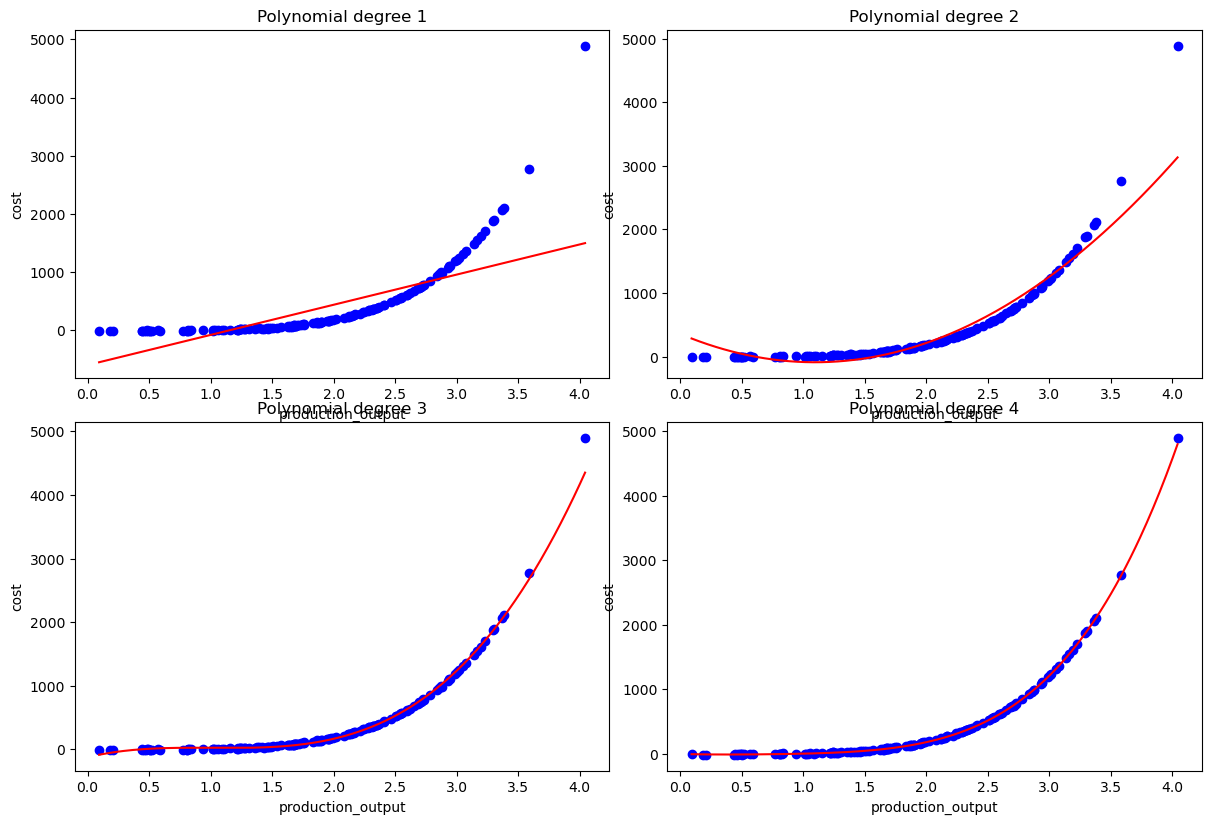

In [9]:
rmse_train = []
rmse_test = []
r2_train = []
r2_test = []
max_degree = 4

def plot_polynomial_fit(X, y, degree, linreg, ax):
    ax.scatter(X, y, color='blue')
    X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    y_range_pred = linreg.predict(poly.transform(X_range))
    ax.plot(X_range, y_range_pred, color='red')
    ax.set_title(f"Polynomial degree {degree}")
    ax.set_xlabel('production_output')
    ax.set_ylabel('cost')

n_rows = max_degree // 2
n_cols = max_degree // n_rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
fig.tight_layout()

for degree in range(1, max_degree + 1):
    row = (degree - 1) // n_cols
    col = (degree - 1) % n_cols
    ax = axes[row, col]

    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    linreg = LinearRegression().fit(X_train_poly, y_train)

    y_train_pred = linreg.predict(X_train_poly)
    y_test_pred = linreg.predict(X_test_poly)

    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    r2_train.append(r2_score(y_train, y_train_pred))
    r2_test.append(r2_score(y_test, y_test_pred))

    plot_polynomial_fit(X, y, degree, linreg, ax)

for degree, rt, rv, r2t, r2v in zip(range(1, max_degree + 1), rmse_train, rmse_test, r2_train, r2_test):
    print(f"Degree {degree}")
    print(f"Training RMSE: {rt:.2f}, Testing RMSE: {rv:.2f}")
    print(f"Training R^2: {r2t:.2f}, Testing R^2: {r2v:.2f}")
    print()

best_degree = np.argmin(rmse_test) + 1
print(f"The model with polynomial degree {best_degree} provides the most appropriate prediction based on RMSE.")
plt.show()


Degree 4 has the lowest RMSE for both training and testing, which means it predicts the data most accurately.It also has the highest R^2 for both training and testing, indicating that it fits the data very well.

To justify this choice, you can say that Degree 4 fits the data the best and has the lowest prediction error, making it the most suitable model.

## Exercise 4 : Log Likelihood (27 points in total)
For a model with two independent variables x1 (Weight) and x2 (Length), compute the log-likelihood for the model: ŷ = 0.1 x1 + 0.1 x2 , where the dependent variable ŷ represents the prediction for Height. Given the dataset below (in the table), assuming that the measurements have normal distribution, please complete the table. 

Round your answer to 4 d.p. For simplicity, use and log base 10.

Hint: $f(y_i)=\frac{1}{\sqrt{2\piσ^2}}e^{\frac{-(y_i-ŷ_i)^2}{2σ^2}}$

Model 1: 
Weight x1 | Length x2 | Actual Height y | Predicted Height ŷ | squared residual (y - ŷ )^2 | Log-Likelihood
---|---|---|---|---|---|
7.0 | 50 | 5.80
6.0 | 55 | 5.70
8.0 | 56 | 6.00

In [12]:
data = {
    'Weight x1': [7.0, 6.0, 8.0],
    'Length x2': [50, 55, 56],
    'Actual Height y': [5.80, 5.70, 6.00]
}
df = pd.DataFrame(data)

df['Predicted Height ŷ'] = 0.1 * df['Weight x1'] + 0.1 * df['Length x2']
df['Squared Residual (y - ŷ)^2'] = (df['Actual Height y'] - df['Predicted Height ŷ'])**2

variance = 1
log_likelihoods = []

for i in range(3):
    ll = 1 / (np.sqrt(2 * np.pi * variance)) * np.exp(-df['Squared Residual (y - ŷ)^2'][i] / (2 * variance))
    log_likelihoods.append(np.log10(ll))

df['Log-Likelihood'] = log_likelihoods

df = df.round(4)

display(df)

Weight x1  Length x2  Actual Height y  Predicted Height ŷ  \
0        7.0         50              5.8                 5.7   
1        6.0         55              5.7                 6.1   
2        8.0         56              6.0                 6.4   

   Squared Residual (y - ŷ)^2  Log-Likelihood  
0                        0.01         -0.4013  
1                        0.16         -0.4338  
2                        0.16         -0.4338